# Exploratory Data Analysis

## Specifying the Data Analytic Question

Being provided with Eastern Africa Finance information. The main objective to this research is.

-To find out how we can predict which individuals are most likely to have or use a bank account?

## Defining the Metric for Success

For the project to be successful,the following should be deliverd
1. Able to compare the gender with bank account.
2. Able to find loction with more people with bank account.
3. Find the type of job with more people with bank account.
4. Find age with more people with bank account.

## Understanding the context

Financial inclusion is the availability and equality of opportunities to access financial services. 

Financial inclusion continues to deepen in the East African region. InterMedia’s latest Financial Inclusion Insights (FII) data shows that in Kenya, Tanzania and Uganda, 73%, 56% and 46% of adults, respectively, are financially included, and nearly all of them have registered mobile money accounts.  As financial inclusion expands, more attention is being placed on how the public and private sector can promote the use of digital financial services (DFS) and products for a broader set of use cases.

## Experimental Design

The following are steps that i intend to take to conduct this study
 - Load datasets
 - Checking the available data
 - Data preparation
 - Perform Exploratory analysis 

*italicized text*

## Data Relevance

# Load Dataset

In [ ]:
# import pandas
import pandas as pd

# import numpy
import numpy as np

# Importing Seaborn
import seaborn as sns

# Importing Matplotlib
import matplotlib.pyplot as plt

pd.options.mode.chained_assignment = None

In [162]:
# Load dataset
# url="http://bit.ly/FinancialDataset"
fin=pd.read_csv("http://bit.ly/FinancialDataset")
fin

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed


In [ ]:
# Data information
fin.info()

### Cleanning Dataset


In [ ]:
# Find missing value
fin.isnull().sum()

In [ ]:
# Drop missing values
fin_df=fin.dropna()
fin_df

In [ ]:
# Find duplicate values
fin_df.duplicated().sum()

In [ ]:
# Drop irrelevant column
fin_df.drop('uniqueid', inplace=True, axis=1)
fin_df

In [ ]:
# Rename columns
fin_df.rename(columns = {'Has a Bank account':'with_bank_account', 'Type of Location':'location','Respondent Age':'age','gender_of_respondent':'gender',
                              'Cell Phone Access':'with_cell_phone','The relathip with head':'relationship_with_head'}, inplace = True) 
fin_df.head()

In [166]:
# Replace white space in columns with underscore
fin_df.columns=fin_df.columns.str.lower().str.replace(" ", "_")
fin_df

# Change columns to small letters
fin_df.columns=map(str.lower,fin_df.columns)
fin_df



,country,year,with_bank_account,location,with_cell_phone,household_size,age,gender,relationship_with_head,marital_status,level_of_educuation,type_of_job
0,Kenya,2018,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


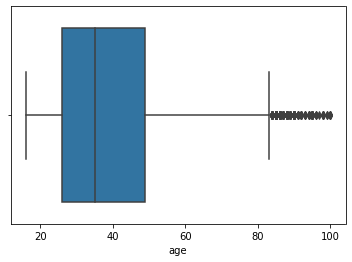

In [167]:
# find outliers
sns.boxplot(fin_df['age'])

#  Univariate Analysis

### Frequency Tables

In [168]:
# country frequency
fin_fr=fin_df.with_bank_account.value_counts()
fin_fr

No     20046
Yes     3297
Name: with_bank_account, dtype: int64

In [169]:
# Age frequency
fin_age=fin_df.age.value_counts()
fin_age

30.0     1043
35.0      831
25.0      785
28.0      742
32.0      707
         ... 
100.0       5
93.0        4
96.0        3
99.0        2
97.0        1
Name: age, Length: 85, dtype: int64

## Bar Charts, Histograms and Box plot

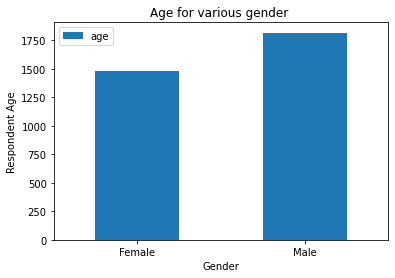

In [170]:
#output data where bank account is yes
bank=fin_df.loc[fin_df['with_bank_account']=='Yes']
bank

# group by country
group=bank.groupby(['gender']).count().reset_index()
group 

# plotting bar charts of age against gender
colors = ['blue', 'red']
group.plot.bar(x='gender', y='age', rot=0)

# Labelling our x axis
plt.xlabel("Gender")

# Labelling our y axis
plt.ylabel("Respondent Age")

# Giving a title to our Bar chart
plt.title("Age for various gender ")

# Displaying our chart
plt.show()

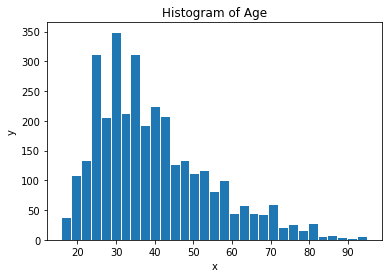

In [171]:
# Plot histogram
bank=fin_df.loc[fin_df['with_bank_account']=='Yes']
bank
age=bank['age']
plt.hist(age, bins='auto', histtype='bar', rwidth=0.9)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Histogram of Age') 
plt.show()

# When a distribution is skewed to the right, the tail on the curve’s right-hand side is longer than the tail on the left-hand side, 
#
# from the below histograme show that it is skew to right this means that age mean is greater than the age mode.

In [55]:
# to prove that the it is skew to right we do the mean and mode
print('mean is ',bank['age'].mean())
print('mode is ',bank['age'].mode())

mean is  39.6016333938294
mode is  0    30.0
dtype: float64


## Pie Chart

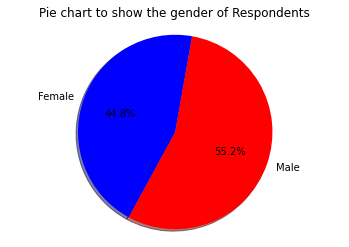

In [29]:
# Plotting pie chart
gd_df= bank.groupby(['gender']).count().reset_index()

colors = ['blue', 'red']
gender= gd_df['gender']
age=gd_df['age']

# plotting the pie chart
plt.pie(age, labels=gender, colors=colors, autopct='%1.1f%%', shadow=True, startangle=80)
#plt.pie(fare,explode= explode1, labels=labels1, colors=colors1, autopct='%1.1f%%', shadow=True, startangle=130)

plt.title('Pie chart to show the gender of Respondents')
plt.axis('equal')
plt.show()

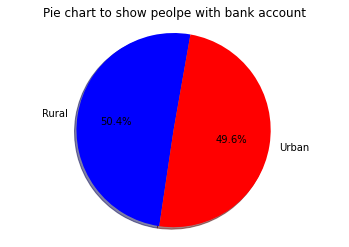

In [46]:
# Plotting pie chart
loc_df= bank.groupby(['location']).count().reset_index()

colors = ['blue', 'red']
location= loc_df['location']
age=loc_df['age']

# plotting the pie chart
plt.pie(age, labels=location, colors=colors, autopct='%1.1f%%', shadow=True, startangle=80)
#plt.pie(fare,explode= explode1, labels=labels1, colors=colors1, autopct='%1.1f%%', shadow=True, startangle=130)

plt.title('Pie chart to show peolpe with bank account')
plt.axis('equal')
plt.show()

## Central Tendency

In [35]:
# Mean of people's age with bank account
bank['age'].mean()

39.6016333938294

In [47]:
# median
bank['age'].median()

36.0

In [52]:
# mode
bank['age'].mode()

0    30.0
dtype: float64

In [56]:
#  Kurtosis
# Below shows the kurtosis is greater than zero, 
# this means that the data is much distributed moer around the mean
bank["age"].kurt()

0.46803748937910283

# Bivariate Analysis

##  Scatter Plots

Text(0, 0.5, 'No of people with bank account')

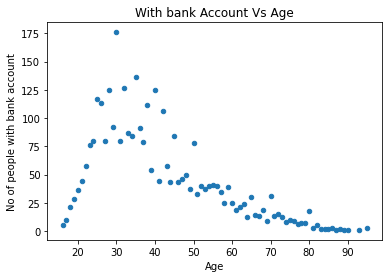

In [69]:
# Plotting our scatterplot
bank
age_df=bank.groupby('age').count().reset_index()
age_df
age_df.plot(x='age',y='household_size', kind='scatter')

# Giving our scatterplot a title
plt.title('With bank Account Vs Age')

# Labelling our x axis
plt.xlabel('Age')

# Labelling our y axis
plt.ylabel('No of people in a house')

# Displaying our scatterplot
# plt.show()

# There is a correlation between age and people in a household
#  at the younger  stage there are less people in a given household, at middle age more people arre in an household,
#  and at old age people in trend to be in less people in a household

## Line Charts

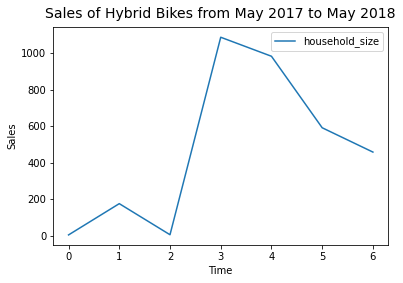

In [78]:

# Plotting our line graph
ag=bank.groupby('level_of_educuation').count().reset_index()
ag[["household_size"]].plot()

# Giving a title to our line graph
plt.title("Sales of Hybrid Bikes from May 2017 to May 2018", fontsize=14, y=1.015)

# Labelling the y-axis
plt.ylabel('Sales')

# Labelling the x-axis
plt.xlabel('Time')

# Displaying our graph
plt.show()

## Correlation

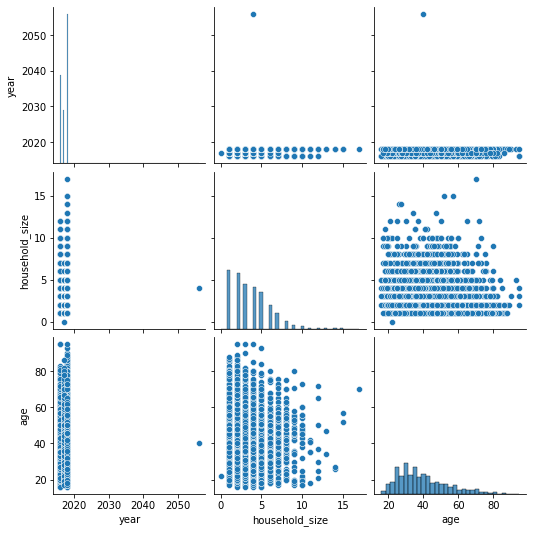

In [70]:
# Ploting the bivariate summaries and recording our observations
sns.pairplot(bank)
plt.show()

# Multivariate Analysis

## PCA

In [172]:
#  Preprocessing
# 
X = fin_df.drop(columns=['country','year','with_bank_account','location','with_cell_phone','gender','relationship_with_head',
             'marital_status','level_of_educuation','type_of_job'], axis=1)
y = fin_df['with_bank_account']

In [174]:
y

0        Yes
1         No
2        Yes
3         No
4         No
        ... 
23519     No
23520     No
23521     No
23522     No
23523     No
Name: with_bank_account, Length: 23343, dtype: object

In [175]:
# Splitting the dataset into the Training set and Test set
#
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [176]:
# Normalization
# 
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [177]:
from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [178]:
# Applying PCA
# 
from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [179]:
# Explained Variance Ratio
# 
explained_variance = pca.explained_variance_ratio_

explained_variance

array([0.55893261, 0.44106739])

In [180]:
# Using 1 Principal Component
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [181]:
# Training and Making Predictions
# In this case we'll use random forest classification for making the predictions.
# 
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [182]:
#  Performance Evaluation
# 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))

# Noting that from the output that with only one feature, 
# the random forest algorithm is able to correctly predict 4008 out of 4669 instances, 
# resulting in 85.84% accuracy.

[[4008    0]
 [ 661    0]]
Accuracy 0.8584279288926965


## Bar

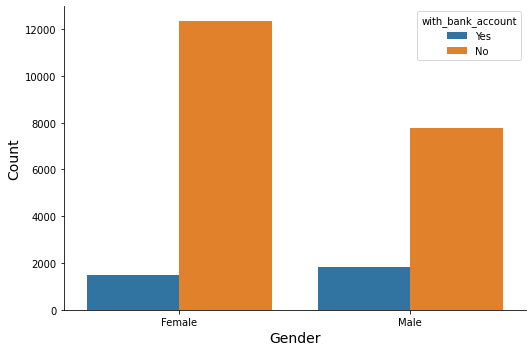

In [92]:
sns.catplot( x='gender',
             kind="count", 
             hue="with_bank_account", 
             height=5, 
             aspect=1.5,
             legend_out=False, 
             data=fin)
plt.xlabel("Gender", size=14)
plt.ylabel("Count", size=14)
plt.tight_layout()

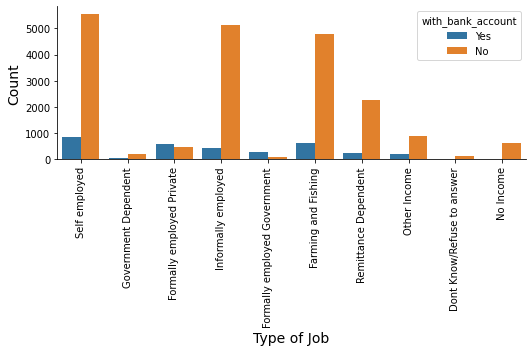

In [106]:
# job type with the access to bank account
g=sns.catplot( x='type_of_job',
             kind="count", 
             hue="with_bank_account", 
             height=5, 
             aspect=1.5,
             legend_out=False,
             data=fin)
g.set_xticklabels(rotation=90)
plt.xlabel("Type of Job", size=14)
plt.ylabel("Count", size=14)
plt.tight_layout()

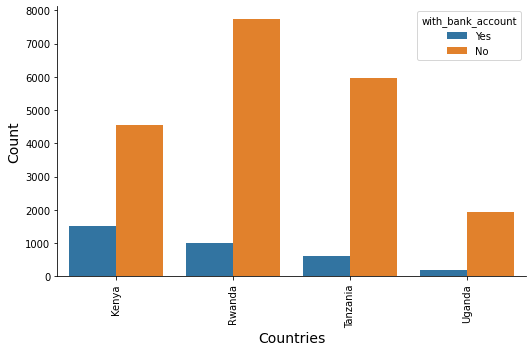

In [105]:
# Comparing Country with the access to bank account
g=sns.catplot( x='country',
             kind="count", 
             hue="with_bank_account", 
             height=5, 
             aspect=1.5,
             legend_out=False,
             data=fin)
g.set_xticklabels(rotation=90)
plt.xlabel("Countries", size=14)
plt.ylabel("Count", size=14)
plt.tight_layout()

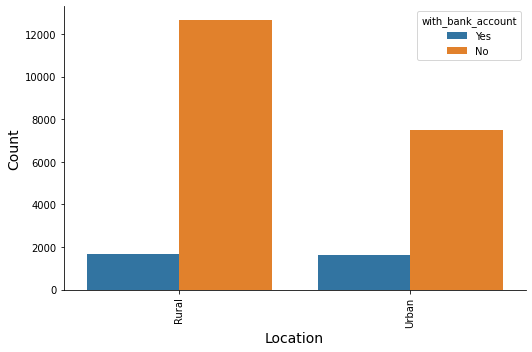

In [104]:
# Finding which location has more people with the access to bank account
g=sns.catplot( x='location',
             kind="count", 
             hue="with_bank_account", 
             height=5, 
             aspect=1.5,
             legend_out=False,
             data=fin)
g.set_xticklabels(rotation=90)
plt.xlabel("Location", size=14)
plt.ylabel("Count", size=14)
plt.tight_layout()

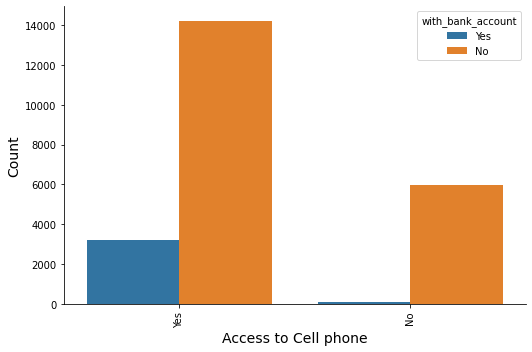

In [111]:
# Comparing Country with the access to bank account
g=sns.catplot( x='with_cell_phone',
             kind="count", 
             hue="with_bank_account", 
             height=5, 
             aspect=1.5,
             legend_out=False,
             data=fin)
g.set_xticklabels(rotation=90)
plt.xlabel("Access to Cell phone", size=14)
plt.ylabel("Count", size=14)
plt.tight_layout()

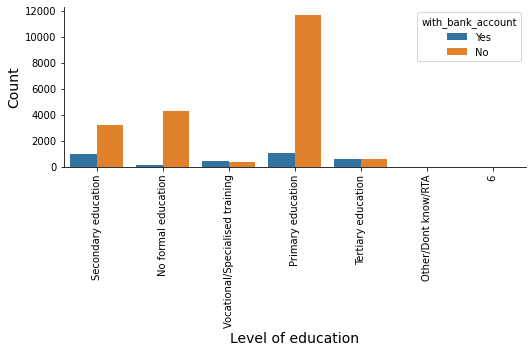

In [110]:
# Comparing Country with the access to bank account
g=sns.catplot( x='level_of_educuation',
             kind="count", 
             hue="with_bank_account", 
             height=5, 
             aspect=1.5,
             legend_out=False,
             data=fin)
g.set_xticklabels(rotation=90)
plt.xlabel("Level of education", size=14)
plt.ylabel("Count", size=14)
plt.tight_layout()